<a href="https://colab.research.google.com/github/uakarsh/TiLT-Implementation/blob/main/how_did_i_prepare_the_stuffs/tilt_part_2_2_preparing_the_semantic_model_funsd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

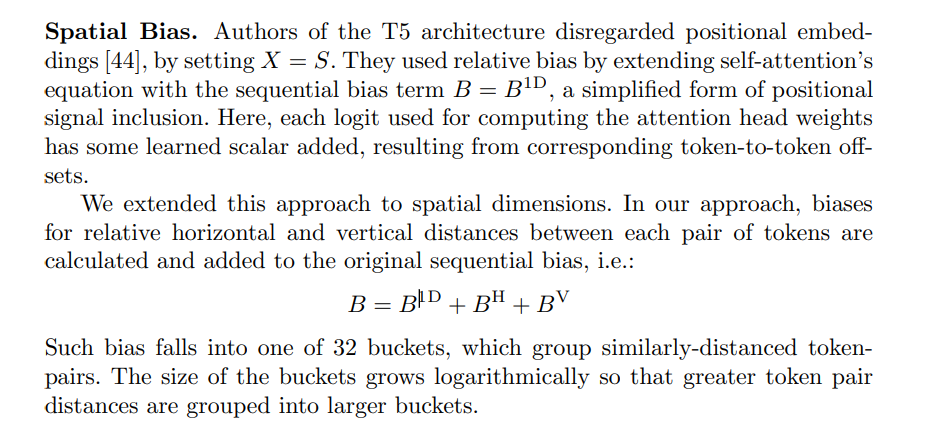

## How to formulate the above part?



#### Rough Code:

For calculation, use this function : [calculate_relative_bias](https://github.com/huggingface/transformers/blob/ae54e3c3b18bac0832ad62ea9b896dfd52a09850/src/transformers/models/t5/modeling_t5.py#L381)

1. For B_1d, follow the standard procedure, i.e `torch.arange(seq_len)[:, None] - torch.arange(seq_len)[None, :]`, and then pass it through the `calculate_relative_bias` function

For 2. and 3. refer chatgpt's answer and below

<!-- 2. For B_h, take the `x_mid` of `bbox_1, bbox_2`, subtract the two, in the same way that has been done above, and then pass it through the `calculate_relative_bias` function

3. Similarily for B_w, take the `y_mid` of `bbox_1, bbox_2`, subtract the two, in the same way that has been done above, and then pass it through the `calculate_relative_bias` function -->

In [ ]:
!pip install -qqq transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.4 MB/s eta 0:00:00


In [ ]:
# import math
# import torch
# import torch.nn as nn

In [ ]:
# def _relative_position_bucket(relative_position, bidirectional=False, num_buckets=32, max_distance=128):
#         """
#         Adapted from Mesh Tensorflow:
#         https://github.com/tensorflow/mesh/blob/0cb87fe07da627bf0b7e60475d59f95ed6b5be3d/mesh_tensorflow/transformer/transformer_layers.py#L593
#         Translate relative position to a bucket number for relative attention. The relative position is defined as
#         memory_position - query_position, i.e. the distance in tokens from the attending position to the attended-to
#         position. If bidirectional=False, then positive relative positions are invalid. We use smaller buckets for
#         small absolute relative_position and larger buckets for larger absolute relative_positions. All relative
#         positions >=max_distance map to the same bucket. All relative positions <=-max_distance map to the same bucket.
#         This should allow for more graceful generalization to longer sequences than the model has been trained on
#         Args:
#             relative_position: an int32 Tensor
#             bidirectional: a boolean - whether the attention is bidirectional
#             num_buckets: an integer
#             max_distance: an integer
#         Returns:
#             a Tensor with the same shape as relative_position, containing int32 values in the range [0, num_buckets)
#         """
#         relative_buckets = 0
#         if bidirectional:
#             num_buckets //= 2
#             relative_buckets += (relative_position > 0).to(torch.long) * num_buckets
#             relative_position = torch.abs(relative_position)
#         else:
#             relative_position = -torch.min(relative_position, torch.zeros_like(relative_position))
#         # now relative_position is in the range [0, inf)

#         # half of the buckets are for exact increments in positions
#         max_exact = num_buckets // 2
#         is_small = relative_position < max_exact

#         # The other half of the buckets are for logarithmically bigger bins in positions up to max_distance
#         relative_position_if_large = max_exact + (
#             torch.log(relative_position.float() / max_exact)
#             / math.log(max_distance / max_exact)
#             * (num_buckets - max_exact)
#         ).to(torch.long)
#         relative_position_if_large = torch.min(
#             relative_position_if_large, torch.full_like(relative_position_if_large, num_buckets - 1)
#         )

#         relative_buckets += torch.where(is_small, relative_position, relative_position_if_large)
#         return relative_buckets

In [ ]:
# relative_attention_bias = nn.Embedding(32, 8)
# relative_horizontal_bias = nn.Embedding(32, 8)
# relative_vertical_bias = nn.Embedding(32, 8)

# total_buckets = 32
# denominator_to_divide = 512 // 32

In [ ]:
# def compute_bias_1d(query_length:int = 512, key_length:int = 512, device=None):
#         """Compute binned relative position bias"""
#         if device is None:
#             device = "cpu"
#         context_position = torch.arange(query_length, dtype=torch.long, device=device)[:, None]
#         memory_position = torch.arange(key_length, dtype=torch.long, device=device)[None, :]
#         relative_position = memory_position - context_position  # shape (query_length, key_length)
#         relative_position_bucket = _relative_position_bucket(
#             relative_position,  # shape (query_length, key_length)
#             bidirectional=False,
#             num_buckets=32,
#             max_distance=128,
#         )
#         values = relative_attention_bias(relative_position_bucket)  # shape (query_length, key_length, num_heads)
#         values = values.permute([2, 0, 1]).unsqueeze(0)  # shape (1, num_heads, query_length, key_length)
#         return values


# def compute_vertical_horizontal_bias(total_boxes:int = 512, device=None):

#       """Compute the vertical and horizontal bias"""
#       if device is None:
#             device = "cpu"
#       indices = torch.arange(total_boxes, dtype = torch.long, device = device)
#       h_distances = (indices % total_buckets)[:, None] - (indices % total_buckets)[None, :]
#       v_distances = (indices // denominator_to_divide)[:, None] - (indices // denominator_to_divide)[None, :]

#       h_distances_bucket = _relative_position_bucket(
#             h_distances,  # shape (query_length, key_length)
#             bidirectional=False,
#             num_buckets=32,
#             max_distance=128,
#         )
      

#       v_distances_bucket = _relative_position_bucket(
#             v_distances,  # shape (query_length, key_length)
#             bidirectional=False,
#             num_buckets=32,
#             max_distance=128,
#         )
      
#       h_distances_values = relative_horizontal_bias(h_distances_bucket)  # shape (query_length, key_length, num_heads)
#       h_distances_values = h_distances_values.permute([2, 0, 1]).unsqueeze(0)  # shape (1, num_heads, query_length, key_length)

#       v_distances_values = relative_vertical_bias(v_distances_bucket)  # shape (query_length, key_length, num_heads)
#       v_distances_values = v_distances_values.permute([2, 0, 1]).unsqueeze(0)  # shape (1, num_heads, query_length, key_length)

#       return h_distances_values, v_distances_values

In [ ]:
# bias_1d = compute_bias_1d()
# h_distances_values, v_distances_values = compute_vertical_horizontal_bias()

In [ ]:
# bias_1d.shape, h_distances_values.shape, v_distances_values.shape

## Actual Code starts

### 1. T5 LayerNorm

In [ ]:
from transformers import AutoConfig
t5_config = AutoConfig.from_pretrained("t5-base")
t5_config.use_cache = False 

In [ ]:
import torch
import torch.nn as nn
import math

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
hidden_size = 768
random_numbers = torch.randn(1, 512, hidden_size).to(device)

In [ ]:
class T5LayerNorm(nn.Module):
    def __init__(self, hidden_size, eps = 1e-6):
        """
        Construct a layernorm module in the T5 Style. No bias and no subtraction of mean.
        """
        super().__init__()
        self.weight = nn.Parameter(torch.ones(hidden_size))
        self.variance_epsilon = eps

    def forward(self, hidden_states):

        # T5 uses a layer_norm which only scales and doesn't shift, which is also known as Root Mean
        # Square Layer Normalization https://arxiv.org/abs/1910.07467 thus varience is calculated
        # w/o mean and there is no bias. Additionally we want to make sure that the accumulation for
        # half-precision inputs is done in fp32

        variance = hidden_states.to(torch.float32).pow(2).mean(-1, keepdim = True)
        hidden_states = hidden_states * torch.rsqrt(variance + self.variance_epsilon)

        # convert into half-precision if necessary
        if self.weight.dtype in [torch.float16, torch.bfloat16]:
            hidden_states = hidden_states.to(self.weight.dtype)

        return self.weight * hidden_states

In [ ]:
# layer_norm = T5LayerNorm(hidden_size).to(device)
# normalized_numbers = layer_norm(random_numbers)
# normalized_numbers.shape

## 2. T5DenseActDense

In [ ]:
class T5DenseActDense(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.wi = nn.Linear(config.d_model, config.d_ff, bias = False)
        self.wo = nn.Linear(config.d_ff, config.d_model, bias = False)
        self.dropout = nn.Dropout(config.dropout_rate)
        self.act = nn.ReLU()

    def forward(self, hidden_states):
        hidden_states = self.wi(hidden_states)
        hidden_states = self.act(hidden_states)
        hidden_states = self.dropout(hidden_states)
        if hidden_states.dtype != self.wo.weight.dtype and self.wo.weight.dtype != torch.int8:
            hidden_states = hidden_states.to(self.wo.weight.dtype)
        hidden_states = self.wo(hidden_states)
        return hidden_states

In [ ]:
# t5_dense_act_dense = T5DenseActDense(t5_config).to(device)
# dense_act_dense_output = t5_dense_act_dense(random_numbers)
# dense_act_dense_output.shape

## 3. T5DenseGatedActDense

In [ ]:
class T5DenseGatedActDense(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.wi_0 = nn.Linear(config.d_model, config.d_ff, bias = False)
        self.wi_1 = nn.Linear(config.d_model, config.d_ff, bias = False)
        self.wo = nn.Linear(config.d_ff, config.d_model, bias = False)
        self.dropout = nn.Dropout(config.dropout_rate)
        self.act = nn.ReLU()

    def forward(self, hidden_states):
        hidden_gelu = self.act(self.wi_0(hidden_states))
        hidden_linear = self.wi_1(hidden_states)
        hidden_states = hidden_gelu * hidden_linear
        hidden_states = self.dropout(hidden_states)
        if hidden_states.dtype != self.wo.weight.dtype and self.wo.weight.dtype != torch.int8:
            hidden_states = hidden_states.to(self.wo.weight.dtype)
        hidden_states = self.wo(hidden_states)
        return hidden_states

In [ ]:
# t5_dense_gate_act_dense = T5DenseGatedActDense(t5_config).to(device)
# dense_act_dense_output = t5_dense_act_dense(random_numbers)
# dense_act_dense_output.shape

## 4. T5LayerFF

In [ ]:
class T5LayerFF(nn.Module):
    def __init__(self, config):
        super().__init__()
        if config.is_gated_act:
            self.DenseReluDense = T5DenseGatedActDense(config)
        else:
            self.DenseReluDense = T5DenseActDense(config)
        
        self.layer_norm = T5LayerNorm(config.d_model, eps = config.layer_norm_epsilon)
        self.dropout = nn.Dropout(config.dropout_rate)
    
    def forward(self, hidden_states):
        forwarded_states = self.layer_norm(hidden_states)
        forwarded_states = self.DenseReluDense(forwarded_states)
        hidden_states = hidden_states + self.dropout(forwarded_states)
        return hidden_states

In [ ]:
# t5_ff = T5LayerFF(t5_config).to(device)
# output = t5_ff(random_numbers)
# output.shape

## 5. T5Attention

In [ ]:
class T5Attention(nn.Module):
    def __init__(self, config, has_relative_attention_bias=False):
        super().__init__()
        self.is_decoder = config.is_decoder
        self.has_relative_attention_bias = has_relative_attention_bias
        self.relative_attention_num_buckets = config.relative_attention_num_buckets
        self.relative_attention_max_distance = config.relative_attention_max_distance
        self.d_model = config.d_model
        self.key_value_proj_dim = config.d_kv
        self.n_heads = config.num_heads
        self.dropout = config.dropout_rate
        self.inner_dim = self.n_heads * self.key_value_proj_dim

        self.q = nn.Linear(self.d_model, self.inner_dim, bias=False)
        self.k = nn.Linear(self.d_model, self.inner_dim, bias=False)
        self.v = nn.Linear(self.d_model, self.inner_dim, bias=False)
        self.o = nn.Linear(self.inner_dim, self.d_model, bias=False)

        if self.has_relative_attention_bias:
            self.relative_attention_bias = nn.Embedding(
                self.relative_attention_num_buckets, self.n_heads)
            self.relative_horizontal_bias = nn.Embedding(
                self.relative_attention_num_buckets, self.n_heads)
            self.relative_vertical_bias = nn.Embedding(
                self.relative_attention_num_buckets, self.n_heads)

        self.gradient_checkpointing = False

    @staticmethod
    def _relative_position_bucket(relative_position, bidirectional=True, num_buckets=32, max_distance=128):
        """
        Adapted from Mesh Tensorflow:
        https://github.com/tensorflow/mesh/blob/0cb87fe07da627bf0b7e60475d59f95ed6b5be3d/mesh_tensorflow/transformer/transformer_layers.py#L593
        Translate relative position to a bucket number for relative attention. The relative position is defined as
        memory_position - query_position, i.e. the distance in tokens from the attending position to the attended-to
        position. If bidirectional=False, then positive relative positions are invalid. We use smaller buckets for
        small absolute relative_position and larger buckets for larger absolute relative_positions. All relative
        positions >=max_distance map to the same bucket. All relative positions <=-max_distance map to the same bucket.
        This should allow for more graceful generalization to longer sequences than the model has been trained on
        Args:
            relative_position: an int32 Tensor
            bidirectional: a boolean - whether the attention is bidirectional
            num_buckets: an integer
            max_distance: an integer
        Returns:
            a Tensor with the same shape as relative_position, containing int32 values in the range [0, num_buckets)
        """
        relative_buckets = 0
        if bidirectional:
            num_buckets //= 2
            relative_buckets += (relative_position >
                                 0).to(torch.long) * num_buckets
            relative_position = torch.abs(relative_position)
        else:
            relative_position = - \
                torch.min(relative_position,
                          torch.zeros_like(relative_position))
        # now relative_position is in the range [0, inf)

        # half of the buckets are for exact increments in positions
        max_exact = num_buckets // 2
        is_small = relative_position < max_exact

        # The other half of the buckets are for logarithmically bigger bins in positions up to max_distance
        relative_position_if_large = max_exact + (
            torch.log(relative_position.float() / max_exact)
            / math.log(max_distance / max_exact)
            * (num_buckets - max_exact)
        ).to(torch.long)
        relative_position_if_large = torch.min(
            relative_position_if_large, torch.full_like(
                relative_position_if_large, num_buckets - 1)
        )

        relative_buckets += torch.where(is_small,
                                        relative_position, relative_position_if_large)
        return relative_buckets

    def compute_bias_1d(self, query_length, key_length, device=None):
        """Compute binned relative position bias"""
        if device is None:
            device = self.relative_attention_bias.weight.device
        context_position = torch.arange(
            query_length, dtype=torch.long, device=device)[:, None]
        memory_position = torch.arange(
            key_length, dtype=torch.long, device=device)[None, :]
        relative_position = memory_position - \
            context_position  # shape (query_length, key_length)
        relative_position_bucket = self._relative_position_bucket(
            relative_position,  # shape (query_length, key_length)
            bidirectional=(not self.is_decoder),
            num_buckets=self.relative_attention_num_buckets,
            max_distance=self.relative_attention_max_distance,
        )
        # shape (query_length, key_length, num_heads)
        values = self.relative_attention_bias(relative_position_bucket)
        # shape (1, num_heads, query_length, key_length)
        values = values.permute([2, 0, 1]).unsqueeze(0)
        return values

    def compute_vertical_horizontal_bias(self, total_boxes: int = 512, device=None):

        denominator_to_divide = total_boxes // self.relative_attention_num_buckets

        """Compute the vertical and horizontal bias"""
        if device is None:
            device = self.relative_attention_bias.weight.device
        indices = torch.arange(total_boxes, dtype=torch.long, device=device)
        h_distances = (indices % self.relative_attention_num_buckets)[
            :, None] - (indices % self.relative_attention_num_buckets)[None, :]
        v_distances = (
            indices // denominator_to_divide)[:, None] - (indices // denominator_to_divide)[None, :]

        h_distances_bucket = self._relative_position_bucket(
            h_distances,  # shape (query_length, key_length)
            bidirectional=(not self.is_decoder),
            num_buckets=self.relative_attention_num_buckets,
            max_distance=self.relative_attention_max_distance,
        )

        v_distances_bucket = self._relative_position_bucket(
            v_distances,  # shape (query_length, key_length)
            bidirectional=(not self.is_decoder),
            num_buckets=self.relative_attention_num_buckets,
            max_distance=self.relative_attention_max_distance,
        )

        h_distances_values = self.relative_horizontal_bias(
            h_distances_bucket)  # shape (query_length, key_length, num_heads)
        h_distances_values = h_distances_values.permute([2, 0, 1]).unsqueeze(
            0)  # shape (1, num_heads, query_length, key_length)

        v_distances_values = self.relative_vertical_bias(
            v_distances_bucket)  # shape (query_length, key_length, num_heads)
        v_distances_values = v_distances_values.permute([2, 0, 1]).unsqueeze(
            0)  # shape (1, num_heads, query_length, key_length)

        return h_distances_values, v_distances_values

    def forward(self, hidden_states, mask=None, key_value_states=None, position_bias=None, past_key_value=None, layer_head_mask=None, query_length=None,
                use_cache=False, output_attentions=False):
        """
        Self-attention (if key_value_states is None) or attention over source sentence (provided by key_value_states).
        """
        # Input is (batch_size, seq_length, dim)
        # Mask is (batch_size, key_length) (non-causal) or (batch_size, key_length, key_length)
        # past_key_value[0] is (batch_size, n_heads, q_len - 1, dim_per_head)
        batch_size, seq_length = hidden_states.shape[:2]

        real_seq_length = seq_length

        if past_key_value is not None:
            assert(len(past_key_value) ==
                   2), f"past_key_value should have 2 past states: keys and values. Got { len(past_key_value)} past states"
            real_seq_length += past_key_value[0].shape[2] if query_length is None else key_value_states.shape[1]

        key_length = real_seq_length if key_value_states is None else key_value_states.shape[
            1]

        def shape(states):
            "projection"
            return states.view(batch_size, -1, self.n_heads, self.key_value_proj_dim).transpose(1, 2)

        def unshape(states):
            """reshape"""
            return states.transpose(1, 2).contiguous().view(batch_size, -1, self.inner_dim)

        def project(hidden_states, proj_layer, key_value_states, past_key_value):
            """project hidden states correctly to key/query states"""
            if key_value_states is None:
                # self-attn
                # (batch_size, n_heads, seq_length, dim_per_head)
                hidden_states = shape(proj_layer(hidden_states))
            elif past_key_value is None:
                # cross-attn
                # (batch_size, n_heads, seq_length, dim_per_head)
                hidden_states = shape(proj_layer(key_value_states))

            if past_key_value is not None:
                if key_value_states is None:
                    # self-attn
                    # (batch_size, n_heads, key_length, dim_per_head)
                    hidden_states = torch.cat(
                        [past_key_value, hidden_states], dim=2)
                elif past_key_value.shape[2] != key_value_states.shape[1]:
                    # checking that the `sequence_length` of the `past_key_value` is the same as
                    # the provided `key_value_states` to support prefix tuning
                    # cross-attn
                    # (batch_size, n_heads, seq_length, dim_per_head)
                    hidden_states = shape(proj_layer(key_value_states))
                else:
                    # cross-attn
                    hidden_states = past_key_value
            return hidden_states

        # get query states
        query_states = shape(self.q(hidden_states))

        # get key/value states
        key_states = project(hidden_states, self.k, key_value_states,
                             past_key_value[0] if past_key_value is not None else None)
        value_states = project(hidden_states, self.v, key_value_states,
                               past_key_value[0] if past_key_value is not None else None)

        # compute score
        # equivalent of torch.einsum("bnqd,bnkd->bnqk", query_states, key_states), compatible with onnx op>9
        scores = torch.matmul(query_states, key_states.transpose(3, 2))

        # Sequential Part
        if position_bias is None:
            if not self.has_relative_attention_bias:
                position_bias = torch.zeros(
                    (1, self.n_heads, real_seq_length, key_length), device=scores.device, dtype=scores.dtype
                )
                if self.gradient_checkpointing and self.training:
                    position_bias.requires_grad = True
            else:
                position_bias = self.compute_bias_1d(
                    real_seq_length, key_length, device=scores.device)
                h_distances_values, v_distances_values = self.compute_vertical_horizontal_bias(
                    total_boxes=real_seq_length, device=scores.device)
                position_bias = position_bias + h_distances_values + v_distances_values

            # if key and values are already calculated
            # we want only the last query position bias
            if past_key_value is not None:
                position_bias = position_bias[:, :, -hidden_states.size(1):, :]

            if mask is not None:
                # (batch_size, n_heads, seq_length, key_length)
                position_bias = position_bias + mask

        position_bias_masked = position_bias  # No pruning right now

        scores += position_bias_masked
        attn_weights = nn.functional.softmax(scores.float(), dim=-1).type_as(
            scores
        )  # (batch_size, n_heads, seq_length, key_length)
        attn_weights = nn.functional.dropout(
            attn_weights, p=self.dropout, training=self.training
        )  # (batch_size, n_heads, seq_length, key_length)

        # Mask heads if we want to
        if layer_head_mask is not None:
            attn_weights = attn_weights * layer_head_mask

        # (batch_size, seq_length, dim)
        attn_output = unshape(torch.matmul(attn_weights, value_states))
        attn_output = self.o(attn_output)

        present_key_value_state = (key_states, value_states) if (
            self.is_decoder and use_cache) else None
        outputs = (attn_output,) + \
            (present_key_value_state,) + (position_bias,)

        if output_attentions:
            outputs = outputs + (attn_weights,)
        return outputs

In [ ]:
# t5_attn = T5Attention(t5_config, has_relative_attention_bias = True).to(device)
# output = t5_attn(random_numbers)

## 6. T5LayerSelfAttention

In [ ]:
class T5LayerSelfAttention(nn.Module):
    def __init__(self, config, has_relative_attention_bias = False):
        super().__init__()
        self.SelfAttention = T5Attention(config, has_relative_attention_bias = has_relative_attention_bias)
        self.layer_norm = T5LayerNorm(config.d_model, eps = config.layer_norm_epsilon)
        self.dropout = nn.Dropout(config.dropout_rate)

    def forward(self, hidden_states, attention_mask = None, position_bias = None, layer_head_mask = None, past_key_value = None, use_cache = False, output_attentions = False):
        normed_hidden_states = self.layer_norm(hidden_states)
        attention_output = self.SelfAttention(normed_hidden_states, mask = attention_mask, position_bias = position_bias,
        layer_head_mask = layer_head_mask, past_key_value = past_key_value, use_cache = use_cache, output_attentions = output_attentions,)
        hidden_states = hidden_states + self.dropout(attention_output[0])
        outputs = (hidden_states,) + attention_output[1:]  # add attentions if we output them
        return outputs

In [ ]:
# t5_attn = T5LayerSelfAttention(t5_config, has_relative_attention_bias = True).to(device)
# output = t5_attn(random_numbers)

## 7. T5CrossAttnLayer

In [ ]:
class T5LayerCrossAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.EncDecAttention = T5Attention(
            config, has_relative_attention_bias=False)
        self.layer_norm = T5LayerNorm(
            config.d_model, eps=config.layer_norm_epsilon)
        self.dropout = nn.Dropout(config.dropout_rate)

    def forward(self, hidden_states, key_value_states, attention_mask=None, position_bias=None, layer_head_mask=None, past_key_value=None, use_cache=False, query_length=None, output_attentions=False, ):
        normed_hidden_states = self.layer_norm(hidden_states)
        attention_output = self.EncDecAttention(normed_hidden_states, mask=attention_mask,
        key_value_states = key_value_states, position_bias=position_bias,
            layer_head_mask=layer_head_mask,
            past_key_value=past_key_value,
            use_cache=use_cache,
            query_length=query_length,
            output_attentions=output_attentions,)
        layer_output = hidden_states + self.dropout(attention_output[0])
        outputs = (layer_output, ) + attention_output[1:] # add attention if we output them
        return outputs

In [ ]:
# t5_attn = T5LayerCrossAttention(t5_config).to(device)
# output = t5_attn(random_numbers, random_numbers)

In [ ]:
class T5Block(nn.Module):
    def __init__(self, config, has_relative_attention_bias=False):
        super().__init__()
        self.is_decoder = config.is_decoder
        self.layer = nn.ModuleList()
        self.layer.append(T5LayerSelfAttention(
            config, has_relative_attention_bias=has_relative_attention_bias))
        if self.is_decoder:
            self.layer.append(T5LayerCrossAttention(config))

        self.layer.append(T5LayerFF(config))

    def forward(self, hidden_states, attention_mask=None, position_bias=None, encoder_hidden_states=None,
                encoder_attention_mask=None, encoder_decoder_position_bias=None, layer_head_mask=None, cross_attn_layer_head_mask=None,
                past_key_value=None, use_cache=False, output_attentions=False, return_dict=True):
        
        if past_key_value is not None:
            expected_num_past_key_values = 2 if encoder_hidden_states is None else 4

            if len(past_key_value) != expected_num_past_key_values:
                raise ValueError(
                    f"There should be {expected_num_past_key_values} past states. "
                    f"{'2 (past / key) for cross attention. ' if expected_num_past_key_values == 4 else ''}"
                    f"Got {len(past_key_value)} past key / value states"
                )

            self_attn_past_key_value = past_key_value[:2]
            cross_attn_past_key_value = past_key_value[2:]
        else:
            self_attn_past_key_value, cross_attn_past_key_value = None, None

        self_attention_outputs = self.layer[0](
            hidden_states,
            attention_mask=attention_mask,
            position_bias=position_bias,
            layer_head_mask=layer_head_mask,
            past_key_value=self_attn_past_key_value,
            use_cache=use_cache,
            output_attentions=output_attentions,
        )
        hidden_states, present_key_value_state = self_attention_outputs[:2]
        attention_outputs = self_attention_outputs[2:]  # Keep self-attention outputs and relative position weights

        # clamp inf values to enable fp16 training
        if hidden_states.dtype == torch.float16 and torch.isinf(hidden_states).any():
            clamp_value = torch.finfo(hidden_states.dtype).max - 1000
            hidden_states = torch.clamp(hidden_states, min=-clamp_value, max=clamp_value)

        do_cross_attention = self.is_decoder and encoder_hidden_states is not None
        if do_cross_attention:
            # the actual query length is unknown for cross attention
            # if using past key value states. Need to inject it here
            if present_key_value_state is not None:
                query_length = present_key_value_state[0].shape[2]
            else:
                query_length = None

            cross_attention_outputs = self.layer[1](
                hidden_states,
                key_value_states=encoder_hidden_states,
                attention_mask=encoder_attention_mask,
                position_bias=encoder_decoder_position_bias,
                layer_head_mask=cross_attn_layer_head_mask,
                past_key_value=cross_attn_past_key_value,
                query_length=query_length,
                use_cache=use_cache,
                output_attentions=output_attentions,
            )
            hidden_states = cross_attention_outputs[0]

            # clamp inf values to enable fp16 training
            if hidden_states.dtype == torch.float16 and torch.isinf(hidden_states).any():
                clamp_value = torch.finfo(hidden_states.dtype).max - 1000
                hidden_states = torch.clamp(hidden_states, min=-clamp_value, max=clamp_value)

            # Combine self attn and cross attn key value states
            if present_key_value_state is not None:
                present_key_value_state = present_key_value_state + cross_attention_outputs[1]

            # Keep cross-attention outputs and relative position weights
            attention_outputs = attention_outputs + cross_attention_outputs[2:]

        # Apply Feed Forward layer
        hidden_states = self.layer[-1](hidden_states)

        # clamp inf values to enable fp16 training
        if hidden_states.dtype == torch.float16 and torch.isinf(hidden_states).any():
            clamp_value = torch.finfo(hidden_states.dtype).max - 1000
            hidden_states = torch.clamp(hidden_states, min=-clamp_value, max=clamp_value)

        outputs = (hidden_states,)

        if use_cache:
            outputs = outputs + (present_key_value_state,) + attention_outputs
        else:
            outputs = outputs + attention_outputs

        return outputs  # hidden-states, present_key_value_states, (self-attention position bias), (self-attention weights), (cross-attention position bias), (cross-attention weights)

In [ ]:
t5_attn = T5Block(t5_config, True).to(device)
output = t5_attn(random_numbers)

In [ ]:
from transformers import AutoModel
t5_model = AutoModel.from_pretrained("t5-base").to(device)

In [ ]:
t5_model.encoder.block[0].layer[0]

T5LayerSelfAttention(
  (SelfAttention): T5Attention(
    (q): Linear(in_features=768, out_features=768, bias=False)
    (k): Linear(in_features=768, out_features=768, bias=False)
    (v): Linear(in_features=768, out_features=768, bias=False)
    (o): Linear(in_features=768, out_features=768, bias=False)
    (relative_attention_bias): Embedding(32, 12)
  )
  (layer_norm): T5LayerNorm()
  (dropout): Dropout(p=0.1, inplace=False)
)

In [ ]:
sum(i.numel() for i in t5_model.parameters()) / 1e6

222.903552

## 7. T5Stack

In [ ]:
from transformers.models import t5
import copy

In [ ]:
class T5Stack(t5.modeling_t5.T5Stack):
  def __init__(self, config, embed_tokens=None):
    super().__init__(config = config, embed_tokens = embed_tokens)
    self.block = nn.ModuleList(
            [T5Block(config, has_relative_attention_bias=bool(i == 0)) for i in range(config.num_layers)]
        )

  def forward(
        self,
        input_ids=None,
        attention_mask=None,
        encoder_hidden_states=None,
        encoder_attention_mask=None,
        inputs_embeds=None,
        head_mask=None,
        cross_attn_head_mask=None,
        past_key_values=None,
        use_cache=None,
        output_attentions=None,
        output_hidden_states=None,
        return_dict=None,
    ):

      return super().forward(input_ids = input_ids, attention_mask = attention_mask, encoder_hidden_states = encoder_hidden_states, encoder_attention_mask = encoder_attention_mask,
                             inputs_embeds = inputs_embeds, head_mask = head_mask, cross_attn_head_mask = cross_attn_head_mask, past_key_values = past_key_values,
                             use_cache = use_cache, output_attentions = output_attentions, output_hidden_states = output_hidden_states, return_dict = return_dict)

In [ ]:
t5_attn = T5Stack(t5_config).to(device)
output = t5_attn(inputs_embeds = random_numbers, use_cache = False)

## 8. T5Model

In [ ]:
# class T5Model(t5.modeling_t5.T5Model):
#   def __init__(self, config):
#     super().__init__(config = config)

#     encoder_config = copy.deepcopy(config)
#     decoder_config = copy.deepcopy(config)

#     self.encoder = T5Stack(encoder_config, self.shared)
#     self.decoder = T5Stack(decoder_config, self.shared)

#     self.post_init()

#   def forward(self, input_ids = None, attention_mask = None, decoder_input_ids = None,
#         decoder_attention_mask = None, head_mask = None, decoder_head_mask = None, cross_attn_head_mask = None, encoder_outputs = None,
#         past_key_values = None, inputs_embeds = None, decoder_inputs_embeds = None, use_cache = None, output_attentions = None, output_hidden_states = None,
#         return_dict = None):
    
#     return super().forward(input_ids = input_ids, attention_mask = attention_mask, decoder_input_ids = decoder_input_ids, decoder_attention_mask = decoder_attention_mask,
#                            head_mask = head_mask, decoder_head_mask = decoder_head_mask, cross_attn_head_mask = cross_attn_head_mask, encoder_outputs = encoder_outputs,
#                            past_key_values = past_key_values, inputs_embeds = inputs_embeds, decoder_inputs_embeds = decoder_inputs_embeds, use_cache = use_cache,
#                            output_attentions = output_attentions, output_hidden_states = output_hidden_states, return_dict = return_dict)

In [ ]:
class T5Model(t5.modeling_t5.T5Model):
  def __init__(self, config):
    super().__init__(config = config)

    encoder_config = copy.deepcopy(config)
    decoder_config = copy.deepcopy(config)

    self.encoder = T5Stack(encoder_config, self.shared)
    self.decoder = T5Stack(decoder_config, self.shared)

    self.post_init()

  def forward(self, **kwargs):
    
    return super().forward(**kwargs)

In [ ]:
t5_attn = T5Model(t5_config).to(device)

In [ ]:
output = t5_attn(encoder_outputs = random_numbers,
                 decoder_input_ids  = torch.randint(0, 511, (1, 512)).to(device) )

## 9. T5ForConditionalGeneration

In [ ]:
class T5ForConditionalGeneration(t5.modeling_t5.T5ForConditionalGeneration):
  def __init__(self, config):
    super().__init__(config = config)

    encoder_config = copy.deepcopy(config)
    decoder_config = copy.deepcopy(config)

    self.encoder = T5Stack(encoder_config, self.shared)
    self.decoder = T5Stack(decoder_config, self.shared)

    self.post_init()

  def forward(self, **kwargs):
    
    return super().forward(**kwargs)

In [ ]:
t5_attn = T5ForConditionalGeneration(t5_config).to(device)

In [ ]:
output = t5_attn(encoder_outputs = random_numbers,
                 labels  = torch.randint(0, 511, (1, 512)).to(device) )

In [ ]:
class T5EncoderModel(t5.modeling_t5.T5ForConditionalGeneration):
  def __init__(self, config):
    super().__init__(config = config)
    self.encoder = T5Stack(config, self.shared)
    self.post_init()

  def forward(self, **kwargs):
    
    return super().forward(**kwargs)

In [ ]:
t5_attn = T5EncoderModel(t5_config).to(device)

In [ ]:
output = t5_attn(input_ids =  torch.randint(0, 511, (1, 512)).to(device), inputs_embeds = random_numbers)  ## Won't work since no decoder involved